## Setup

### Import Libraries

In [ ]:
import torch
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Grayscale, ToTensor

import random
import matplotlib.pyplot as plt
import numpy as np

The torchvision package provides easy access to many publicly available datasets.

#### Load the MNIST dataset.

In [35]:
MNIST_data = datasets.MNIST(
    root="data/raw",
    download=True,
)

Get and plot an example image from the dataset

In [36]:
random.seed(2025)
image, label = MNIST_data[random.randint(0, len(MNIST_data))]

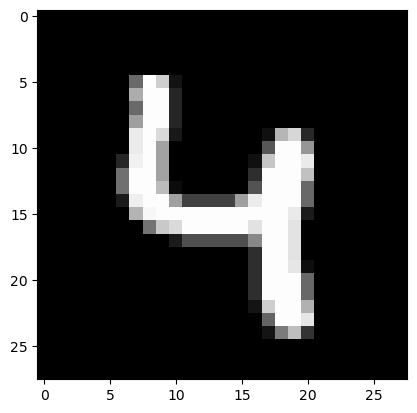

In [37]:
plt.imshow(image, cmap = 'gray')

#### Load the CIFAR10 dataset

In [18]:
cifar10_data = datasets.CIFAR10(
    root="data/raw",
    download=True,
    transform=ToTensor()
)

100%|██████████| 170M/170M [01:35<00:00, 1.79MB/s] 


In [28]:
image, label = cifar10_data[random.randint(0,len(cifar10_data))]

Since CIFAR contains color images, you need to permute the dimensions of the tensor with the image data to be able to plot them using matplotlib's imshow. That's because imshow expects the image to have a different format: H x W x C (height x width x color) rather than C x H x W. There's a function `permute` in torch that we can use to swap the order of the dimensions.

In [34]:
input_var = torch.randn(size=(2,3,5))

print(input_var.size())

input_var = input_var.permute(1,0,2)
print(input_var.size())

torch.Size([2, 3, 5])
torch.Size([3, 2, 5])


In [33]:
print(image.shape)

permuted_image = image.permute(1,2,0)
print(permuted_image.shape)

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


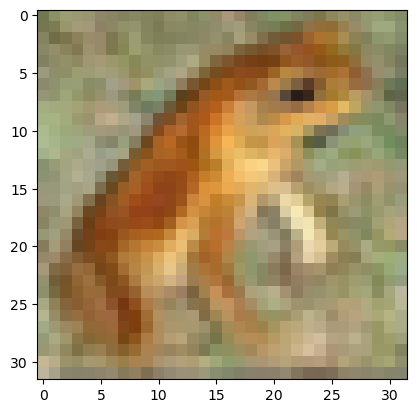

In [32]:
plt.imshow(image.permute(1,2,0))

### Splitting into train and test datasets

By setting a parameter `train` to True or False, respectively, we can split the dataset into training and test data.

In [38]:
training_data = datasets.CIFAR10(
    root="data/raw",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data/raw", 
    train=False,
    download=True,
    transform=ToTensor()
)

#### Data Augmentation - Transformations

Dataloaders are wrappers around the Dataset that splits it into minibatches (which is necessary for stochastic gradient descent). It also makes the data iterable.

In [41]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

The code below iterates through batches for each run.

Batch size: torch.Size([64, 3, 32, 32])


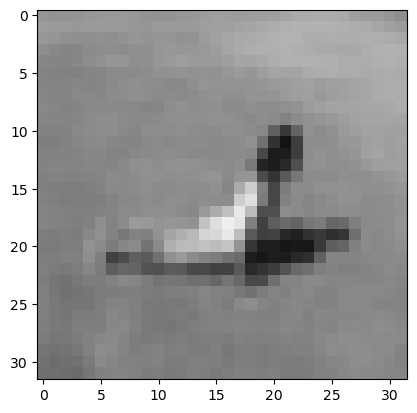

In [44]:
# iter makes the batches iterable and with next we query the next batch
batch_images, batch_labels = next(iter(train_dataloader))
print('Batch size:', batch_images.shape)

plt.imshow(batch_images[0].permute(1,2,0))

Leftover code which is supposed to ensure reproducibility (but variables not defined in tutorial).

In [ ]:
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g_seed = torch.Generator()
g_seed.manual_seed(my_seed)

DataLoader(
    train_dataset,
    batch_size = batch_size,
    num_workers=num_workers,
    worker_init_fn=seed_worker,
    generateor=g_seed
)